In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [64]:
df = pd.read_csv('https://datapolitan-training-files.s3.amazonaws.com/20200506_Police_Incidents.csv')

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (52,57,64) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [65]:
df.head()

,Incident Number w/year,Year of Incident,Service Number ID,Watch,Call (911) Problem,Type of Incident,Type Location,Type of Property,Incident Address,Apartment Number,...,NIBRS Code,NIBRS Group,NIBRS Type,Update Date,X Coordinate,Y Cordinate,Zip Code,City,State,Location1
0,031359-2020,2020,031359-2020-01,2,58 - ROUTINE INVESTIGATION,"THEFT OF PROP > OR EQUAL $2,500 <$30K (NOT SHO...",Single Family Residence - Occupied,NaN,6506 PEMBERTON DR,NaN,...,23H,A,Coded,2020-02-26 14:45:48.0000000,2.492434e+06,7.011514e+06,75230.0,DALLAS,TX,"6506 PEMBERTON DR\nDALLAS, TX 75230\n(32.89150..."
1,064876-2020,2020,064876-2020-01,2,6X - MAJOR DIST (VIOLENCE),CRIMINAL TRESPASS WARNING,Hotel/Motel/ETC,NaN,10835 COMPOSITE DR,410,...,999,C,999 - No Coded,2020-04-12 12:16:01.0000000,2.460671e+06,7.005910e+06,75220.0,DALLAS,TX,"10835 COMPOSITE DR\nDALLAS, TX 75220\n(32.8774..."
2,020512-2020,2020,020512-2020-01,2,PSE/09 - THEFT,"THEFT OF PROP > OR EQUAL $750 <$2,500 (NOT SHO...",Apartment Residence,None,9110 SOUTHWESTERN BLVD,4300,...,23H,A,Coded,2020-04-24 13:00:01.0000000,2.504918e+06,6.998741e+06,75214.0,DALLAS,TX,"9110 SOUTHWESTERN BLVD\nDALLAS, TX 75214\n(32...."
3,805157-2019,2019,805157-2019-01,1,NaN,LOST PROPERTY (NO OFFENSE),Bank/Savings And Loan,NaN,4771 SATURN RD,NaN,...,999,C,999 - No Coded,2019-11-07 19:13:16.0000000,2.536648e+06,7.000784e+06,75041.0,GARLAND,TX,"4771 SATURN RD\nGARLAND, TX 75041\n(32.861041,..."
4,268491-2016,2016,268491-2016-01,1,09V - UUMV,UNAUTHORIZED USE OF MOTOR VEH - AUTOMOBILE,"Highway, Street, Alley ETC",NaN,3112 STATE ST,E,...,NaN,NaN,NaN,2016-11-14 05:41:23.0000000,2.492080e+06,6.977853e+06,75204.0,DALLAS,TX,"3112 STATE ST\nDALLAS, TX 75204\n(32.799547, -..."


In [20]:
df.shape

(407750, 100)

In [21]:
df.columns

Index(['Incident Number w/year', 'Year of Incident', 'Service Number ID',
       'Watch', 'Call (911) Problem', 'Type of Incident', 'Type  Location',
       'Type of Property', 'Incident Address', 'Apartment Number',
       'Reporting Area', 'Beat', 'Division', 'Sector', 'Council District',
       'Target Area Action Grids', 'Community', 'Date1 of Occurrence',
       'Year1 of Occurrence', 'Month1 of Occurence', 'Day1 of the Week',
       'Time1 of Occurrence', 'Day1 of the Year', 'Date2 of Occurrence ',
       'Year2 of Occurrence', 'Month2 of Occurence', 'Day2 of the Week',
       'Time2 of Occurrence', 'Day2 of the Year', 'Date of Report',
       'Date incident created', 'Offense Entered Year',
       'Offense Entered Month', 'Offense Entered Day of the Week',
       'Offense Entered Time', 'Offense Entered  Date/Time', 'CFS Number',
       'Call Received Date Time', 'Call Date Time', 'Call Cleared Date Time',
       'Call Dispatch Date Time', 'Special Report (Pre-RMS)',
       'Per

## Check the timeframe

In [22]:
date_cols = ['Year of Incident',\
             'Date1 of Occurrence','Time1 of Occurrence',\
             'Date2 of Occurrence ','Time2 of Occurrence',\
             'Date of Report','Date incident created',\
             'Offense Entered Year','Offense Entered Month', 'Offense Entered Day of the Week',\
             'Offense Entered Time', 'Offense Entered  Date/Time',\
             'Call Received Date Time','Call Date Time', 'Call Cleared Date Time','Call Dispatch Date Time']

In [23]:
df_date = df[date_cols]

In [28]:
df_date.head()

,Year of Incident,Date1 of Occurrence,Time1 of Occurrence,Date2 of Occurrence,Time2 of Occurrence,Date of Report,Date incident created,Offense Entered Year,Offense Entered Month,Offense Entered Day of the Week,Offense Entered Time,Offense Entered Date/Time,Call Received Date Time,Call Date Time,Call Cleared Date Time,Call Dispatch Date Time
0,2020,2020-02-16 00:00:00.0000000,08:00,2020-02-16 00:00:00.0000000,08:45,2020-02-16 08:59:00.0000000,2020-02-16 09:05:42.0000000,2020,February,Sun,09:05,47,2020-02-16 08:59:52.0000000,2020-02-16 08:59:52.0000000,2020-02-16 09:59:16.0000000,2020-02-16 08:59:53.0000000
1,2020,2020-04-09 00:00:00.0000000,11:50,2020-04-09 00:00:00.0000000,12:04,2020-04-09 12:04:00.0000000,2020-04-09 12:53:38.0000000,2020,April,Thu,12:53,100,2020-04-09 12:04:49.0000000,2020-04-09 12:04:49.0000000,2020-04-09 14:30:26.0000000,2020-04-09 12:11:03.0000000
2,2020,2020-01-29 00:00:00.0000000,13:00,2020-01-31 00:00:00.0000000,08:00,2020-01-31 09:45:00.0000000,2020-01-31 10:16:02.0000000,2020,January,Fri,10:16,31,2020-01-31 09:45:34.0000000,2020-01-31 09:45:34.0000000,2020-01-31 10:48:35.0000000,2020-01-31 09:49:20.0000000
3,2019,2019-11-04 00:00:00.0000000,13:05,2019-11-07 00:00:00.0000000,13:10,2019-11-07 18:16:39.0000000,2019-11-07 19:05:11.0000000,2019,November,Thu,19:05,311,NaN,NaN,NaN,NaN
4,2016,2016-11-09 00:00:00.0000000,00:30,2016-11-09 00:00:00.0000000,07:45,2016-11-09 10:00:00.0000000,2016-11-09 09:51:32.0000000,2016,November,Wed,09:51,314,2016-11-09 07:48:52.0000000,2016-11-09 07:48:51.0000000,2016-11-09 10:56:54.0000000,2016-11-09 09:33:19.0000000


**Min and Max Dates**

In [29]:
df_date['Date incident created'].max()

'2020-05-05 23:25:53.0000000'

In [30]:
df_date['Date incident created'].min()

'2014-06-01 02:34:43.0000000'

**Average incidents per day**

In [32]:
type(df_date['Date incident created'][0])

str

In [36]:
df_date['created_date_format'] = df_date['Date incident created'].apply(lambda x:pd.to_datetime(x))

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [37]:
df_date.head()

,Year of Incident,Date1 of Occurrence,Time1 of Occurrence,Date2 of Occurrence,Time2 of Occurrence,Date of Report,Date incident created,Offense Entered Year,Offense Entered Month,Offense Entered Day of the Week,Offense Entered Time,Offense Entered Date/Time,Call Received Date Time,Call Date Time,Call Cleared Date Time,Call Dispatch Date Time,created_date_format
0,2020,2020-02-16 00:00:00.0000000,08:00,2020-02-16 00:00:00.0000000,08:45,2020-02-16 08:59:00.0000000,2020-02-16 09:05:42.0000000,2020,February,Sun,09:05,47,2020-02-16 08:59:52.0000000,2020-02-16 08:59:52.0000000,2020-02-16 09:59:16.0000000,2020-02-16 08:59:53.0000000,2020-02-16 09:05:42
1,2020,2020-04-09 00:00:00.0000000,11:50,2020-04-09 00:00:00.0000000,12:04,2020-04-09 12:04:00.0000000,2020-04-09 12:53:38.0000000,2020,April,Thu,12:53,100,2020-04-09 12:04:49.0000000,2020-04-09 12:04:49.0000000,2020-04-09 14:30:26.0000000,2020-04-09 12:11:03.0000000,2020-04-09 12:53:38
2,2020,2020-01-29 00:00:00.0000000,13:00,2020-01-31 00:00:00.0000000,08:00,2020-01-31 09:45:00.0000000,2020-01-31 10:16:02.0000000,2020,January,Fri,10:16,31,2020-01-31 09:45:34.0000000,2020-01-31 09:45:34.0000000,2020-01-31 10:48:35.0000000,2020-01-31 09:49:20.0000000,2020-01-31 10:16:02
3,2019,2019-11-04 00:00:00.0000000,13:05,2019-11-07 00:00:00.0000000,13:10,2019-11-07 18:16:39.0000000,2019-11-07 19:05:11.0000000,2019,November,Thu,19:05,311,NaN,NaN,NaN,NaN,2019-11-07 19:05:11
4,2016,2016-11-09 00:00:00.0000000,00:30,2016-11-09 00:00:00.0000000,07:45,2016-11-09 10:00:00.0000000,2016-11-09 09:51:32.0000000,2016,November,Wed,09:51,314,2016-11-09 07:48:52.0000000,2016-11-09 07:48:51.0000000,2016-11-09 10:56:54.0000000,2016-11-09 09:33:19.0000000,2016-11-09 09:51:32


Text(0, 0.5, 'Number of Incidents Created in RMS')

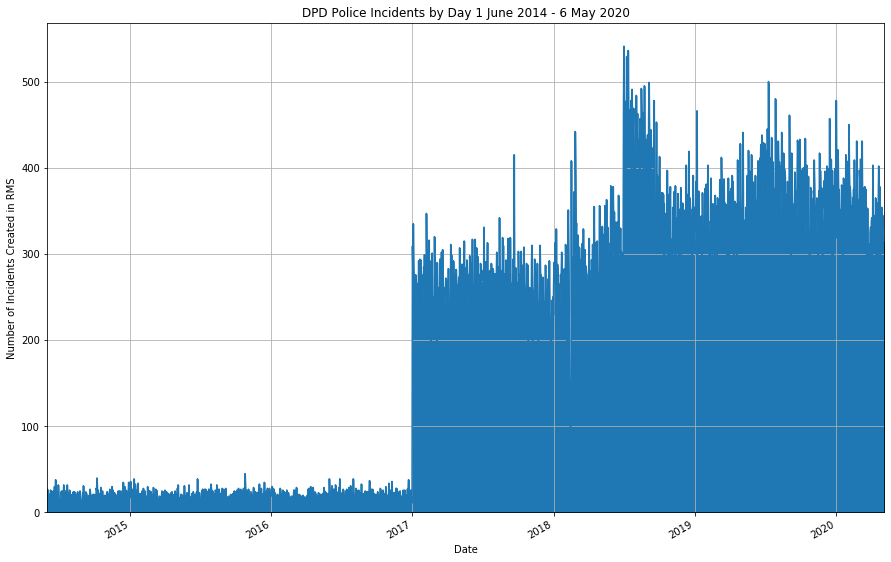

In [52]:
ax = df_date.groupby(df_date['created_date_format'].dt.normalize())['Date of Report'].count()\
.plot(kind='area',figsize=(15,10),grid=True,title='DPD Police Incidents by Day 1 June 2014 - 6 May 2020')
ax.set_xlabel('Date')
ax.set_ylabel('Number of Incidents Created in RMS')

In [54]:
df_date.groupby(df_date['created_date_format'].dt.normalize())['Date of Report'].count().mean()

188.51132686084142

In [55]:
#2017 to 2020
df_date[df_date['created_date_format']>='2017-01-01T00:00:00'].groupby(df_date['created_date_format'].dt.normalize())['Date of Report'].count().mean()

319.40147783251234

Text(0, 0.5, 'Number of Incidents Created in RMS')

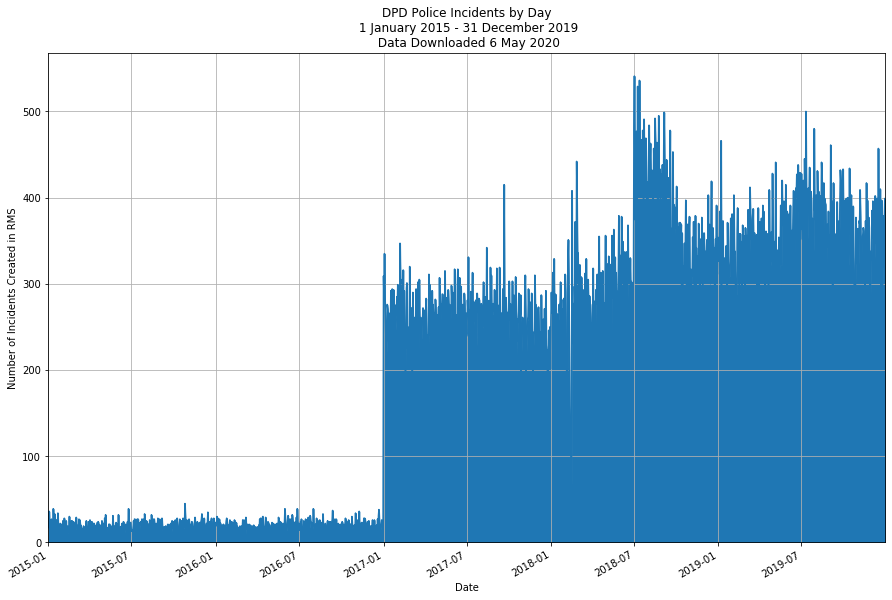

In [58]:
ax = df_date[(df_date['created_date_format']>='2015-01-01T00:00:00')&(df_date['created_date_format']<='2019-12-31T23:59:59')].groupby(df_date['created_date_format'].dt.normalize())['Date of Report'].count()\
.plot(kind='area',figsize=(15,10),grid=True,title='DPD Police Incidents by Day\n 1 January 2015 - 31 December 2019\n Data Downloaded 6 May 2020')
ax.set_xlabel('Date')
ax.set_ylabel('Number of Incidents Created in RMS')

In [60]:
## Count of difference
df_date[(df_date['created_date_format']>='2015-01-01T00:00:00')&(df_date['created_date_format']<='2019-12-31T23:59:59')].count()

Year of Incident                   359577
Date1 of Occurrence                359577
Time1 of Occurrence                359577
Date2 of Occurrence                359577
Time2 of Occurrence                359577
Date of Report                     359577
Date incident created              359577
Offense Entered Year               359577
Offense Entered Month              359577
Offense Entered Day of the Week    359577
Offense Entered Time               359577
Offense Entered  Date/Time         359577
Call Received Date Time            351279
Call Date Time                     351279
Call Cleared Date Time             351096
Call Dispatch Date Time            351228
created_date_format                359577
dtype: int64

In [35]:
pd.to_datetime(df_date['Date incident created'][0])

Timestamp('2020-02-16 09:05:42')

In [61]:
## export Series of date counts for comparison
df_date_ct = df_date.groupby(df_date['created_date_format'].dt.normalize())['Date of Report'].count()

In [66]:
df_date_ct.to_pickle('data/20200506_df_date_ct.p')

## Explore the Call (911) Problem field

## Pull Badge Numbers and Names for Export